## Load in patients dataset

In [95]:
import dask.dataframe as dd
import os

## Path to the directory where the data is located
data_dir = r'R:\Kevin\Data\MIMIC'

In [96]:
# Load the patients.csv file using Dask
patients_df = dd.read_csv(os.path.join(data_dir, 'patients.csv'))

# Show some basic information
print("Dask dataframe created for patients.csv")
print("Number of partitions:", patients_df.npartitions)
print(patients_df.head())

Dask dataframe created for patients.csv
Number of partitions: 1
   subject_id gender  anchor_age  anchor_year anchor_year_group         dod
0    10000032      F          52         2180       2014 - 2016  2180-09-09
1    10000048      F          23         2126       2008 - 2010         NaN
2    10000058      F          33         2168       2020 - 2022         NaN
3    10000068      F          19         2160       2008 - 2010         NaN
4    10000084      M          72         2160       2017 - 2019  2161-02-13


## Load in lab events dataset

In [97]:
# Load the labevents.csv file using Dask
labevents_df = dd.read_csv(os.path.join(data_dir, 'labevents.csv'))

# Show some basic information
print("Dask dataframe created for labevents.csv")
print("Number of partitions:", labevents_df.npartitions)
print(labevents_df.head())

Dask dataframe created for labevents.csv
Number of partitions: 287
   labevent_id  subject_id  hadm_id  specimen_id  itemid order_provider_id  \
0            1    10000032      NaN      2704548   50931            P69FQC   
1            2    10000032      NaN     36092842   51071            P69FQC   
2            3    10000032      NaN     36092842   51074            P69FQC   
3            4    10000032      NaN     36092842   51075            P69FQC   
4            5    10000032      NaN     36092842   51079            P69FQC   

             charttime            storetime value  valuenum valueuom  \
0  2180-03-23 11:51:00  2180-03-23 15:56:00   ___      95.0    mg/dL   
1  2180-03-23 11:51:00  2180-03-23 16:00:00   NEG       NaN      NaN   
2  2180-03-23 11:51:00  2180-03-23 16:00:00   NEG       NaN      NaN   
3  2180-03-23 11:51:00  2180-03-23 16:00:00   NEG       NaN      NaN   
4  2180-03-23 11:51:00  2180-03-23 16:00:00   NEG       NaN      NaN   

   ref_range_lower  ref_range_u

## Determine missingness of hadm_id column

In [98]:
# Calculate missingness of the 'hadm_id' column
# Take a small sample of the data
sampled_labevents_df = labevents_df.sample(frac=0.01).compute()

# Show some basic information about the sampled data
print("Sampled dataframe created for labevents.csv")
print(sampled_labevents_df.head())

# Calculate missingness of the 'hadm_id' column in the sample
missing_hadm_id = sampled_labevents_df['hadm_id'].isna().mean()
print(f"Proportion of missing values in 'hadm_id' (sample): {missing_hadm_id:.2%}")

Sampled dataframe created for labevents.csv
        labevent_id  subject_id     hadm_id  specimen_id  itemid  \
133311       133810    10008460         NaN     88181143   52074   
289467       290514    10017531  27635105.0     65025055   51237   
513029       514948    10032651         NaN     50505552   51301   
155816       156408    10010058  26359957.0     45872888   50970   
494020       495895    10031358  29887601.0     37787395   50902   

       order_provider_id            charttime            storetime value  \
133311            P34LQE  2185-04-04 13:02:00  2185-04-04 16:49:00  0.28   
289467               NaN  2160-02-18 07:30:00  2160-02-18 08:43:00   1.1   
513029            P85HQX  2163-06-06 12:51:00  2163-06-06 16:09:00   5.8   
155816               NaN  2147-11-18 03:19:00  2147-11-18 04:39:00   5.6   
494020               NaN  2159-07-20 05:00:00  2159-07-20 07:58:00    96   

        valuenum valueuom  ref_range_lower  ref_range_upper      flag  \
133311      0.28 

## Load in lab items dataset

In [99]:
# Load the d_labitems.csv file using Dask
d_labitems_df = dd.read_csv(os.path.join(data_dir, 'd_labitems.csv'))

# Show some basic information
print("Dask dataframe created for d_labitems.csv")
print("Number of partitions:", d_labitems_df.npartitions)
print(d_labitems_df.head())

Dask dataframe created for d_labitems.csv
Number of partitions: 1
   itemid                                label  fluid   category
0   50801           Alveolar-arterial Gradient  Blood  Blood Gas
1   50802                          Base Excess  Blood  Blood Gas
2   50803  Calculated Bicarbonate, Whole Blood  Blood  Blood Gas
3   50804                 Calculated Total CO2  Blood  Blood Gas
4   50805                    Carboxyhemoglobin  Blood  Blood Gas


## Load in admissions df

In [100]:
# Load admissions.csv with specified dtype for 'deathtime'
admissions_df = dd.read_csv(
    os.path.join(data_dir, 'admissions.csv'),
    dtype={'deathtime': 'object'}  # set deathtime as object to handle timestamp strings
)

# Print confirmation and basic information
print("Dask dataframe created for admissions.csv")
print("Number of partitions:", admissions_df.npartitions)
print(admissions_df.head())

Dask dataframe created for admissions.csv
Number of partitions: 1
   subject_id   hadm_id            admittime            dischtime deathtime  \
0    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
1    10000032  22841357  2180-06-26 18:27:00  2180-06-27 18:49:00       NaN   
2    10000032  25742920  2180-08-05 23:44:00  2180-08-07 17:50:00       NaN   
3    10000032  29079034  2180-07-23 12:35:00  2180-07-25 17:55:00       NaN   
4    10000068  25022803  2160-03-03 23:16:00  2160-03-04 06:26:00       NaN   

   admission_type admit_provider_id      admission_location  \
0          URGENT            P49AFC  TRANSFER FROM HOSPITAL   
1        EW EMER.            P784FA          EMERGENCY ROOM   
2        EW EMER.            P19UTS          EMERGENCY ROOM   
3        EW EMER.            P06OTX          EMERGENCY ROOM   
4  EU OBSERVATION            P39NWO          EMERGENCY ROOM   

  discharge_location insurance language marital_status   race  \
0              

## Determined tests of interest

In [101]:
# Updated test lists according to routine tests in outpatient settings
cbc_tests = ['WBC', 'WHITE BLOOD CELL', 'RED BLOOD CELL', 'RBC', 'HEMOGLOBIN', 'HEMATOCRIT', 'PLATELET', 'MCV', 'MCH', 'MCHC', 
             'RDW', 'NEUTROPHIL', 'LYMPHOCYTES', 'MONOCYTES', 'EOSINOPHILS', 'BASOPHILS', 'GRANULOCYTES']
cmp_tests = ['SODIUM', 'POTASSIUM', 'CHLORIDE', 'BICARBONATE', 'BUN', 'CREATININE', 'GLUCOSE', 
             'CALCIUM', 'TOTAL PROTEIN', 'ALBUMIN', 'GLOBULIN', 'BILIRUBIN', 'ALKALINE PHOSPHATASE', 'ALT', 'AST']
lipids_tests = ['CHOLESTEROL', 'LDL', 'HDL', 'TRIGLYCERIDES']
diabetes_tests = ['HEMOGLOBIN A1C', 'HbAIC']
thyroid_tests = ['TSH', 'FREE T4', 'THYROXINE', 'TRIIODOTHYRONINE']
urine_tests = ['URINALYSIS', 'MICROALBUMIN', 'CREATININE RATIO', 'YEAST','HYALINE', 'PROTEIN', 'GLUCOSE', 'KETONE',
               'UROBILINOGEN','MCNC','NITRITE','LEUKOCYTE ESTERASE']
surgery_tests = ['PT', 'INR']

# Combine all test names
all_tests = cbc_tests + cmp_tests + lipids_tests + diabetes_tests + thyroid_tests + urine_tests + surgery_tests

# Create a regex pattern to match any of the test labels as substrings (case-insensitive)
pattern = '|'.join([test.upper() for test in all_tests])

# Ensure no NaN values in the relevant columns (fill them with an empty string)
d_labitems_df = d_labitems_df.fillna({'label': '', 'fluid': '', 'category': ''})

# Filter d_labitems for labels that contain any of the routine test names
# and ensure the fluid is 'Blood' or 'Urine', and the category is either 'Chemistry' or 'Hematology'
filtered_tests = d_labitems_df[
    d_labitems_df['label'].str.upper().str.contains(pattern, regex=True) &
    (d_labitems_df['fluid'].str.upper().isin(['BLOOD', 'URINE'])) &
    (d_labitems_df['category'].str.upper().isin(['CHEMISTRY', 'HEMATOLOGY']))
]

# Compute the results
filtered_tests_result = filtered_tests.compute()

# Display the filtered tests
print(filtered_tests_result)



      itemid                           label  fluid   category
50     50852                % Hemoglobin A1c  Blood  Chemistry
53     50855             Absolute Hemoglobin  Blood  Chemistry
59     50861  Alanine Aminotransferase (ALT)  Blood  Chemistry
60     50862                         Albumin  Blood  Chemistry
61     50863            Alkaline Phosphatase  Blood  Chemistry
...      ...                             ...    ...        ...
1621   53162                          RDW-SD  Blood  Chemistry
1641   53182                            MCHC  Blood  Chemistry
1643   53184                             MCH  Blood  Chemistry
1647   53188                     Lymphocytes  Blood  Chemistry
1648   53189                  Platelet Count  Blood  Chemistry

[214 rows x 4 columns]


## Excluded certain tests based on John's input

In [102]:
# Exclude tests that we decide should not be included
excluded_itemids = [50889, 51100, 50950, 50935, 50949, 50951, 51097, 51078, 50864, 51067, 50881, 51005, 50982, 50877, 51224, 51077, 
                    50991, 51076, 51068, 51225, 51223, 51066, 51271, 51273, 51106, 51212, 51272, 51270, 51073, 52129, 51280, 51281]
filtered_tests_result = filtered_tests_result[~filtered_tests_result['itemid'].isin(excluded_itemids)]
# Display the filtered tests
print(filtered_tests_result)

      itemid                           label  fluid   category
50     50852                % Hemoglobin A1c  Blood  Chemistry
53     50855             Absolute Hemoglobin  Blood  Chemistry
59     50861  Alanine Aminotransferase (ALT)  Blood  Chemistry
60     50862                         Albumin  Blood  Chemistry
61     50863            Alkaline Phosphatase  Blood  Chemistry
...      ...                             ...    ...        ...
1621   53162                          RDW-SD  Blood  Chemistry
1641   53182                            MCHC  Blood  Chemistry
1643   53184                             MCH  Blood  Chemistry
1647   53188                     Lymphocytes  Blood  Chemistry
1648   53189                  Platelet Count  Blood  Chemistry

[182 rows x 4 columns]


## Crate lookup for patients table and a race lookup for each subject

In [103]:
# Assuming filtered_tests_result and other necessary Dask DataFrames (labevents_df, patients_df, admissions_df) are already loaded

# Convert d_labitems_df to pandas to map itemid to test names
lab_test_map = dict(zip(filtered_tests_result['itemid'], filtered_tests_result['label']))

# Convert patients_df to a lookup dictionary for demographics (using only the available columns)
patients_lookup = patients_df.set_index('subject_id')[['anchor_age', 'anchor_year', 'gender']].compute().to_dict(orient='index')

# Compute the admissions DataFrame to Pandas for easier manipulation
admissions_df_pandas = admissions_df[['subject_id', 'race']].compute()

# Group by subject_id and check for patients with multiple unique races
race_counts = admissions_df_pandas.groupby('subject_id')['race'].nunique()

# Create a race lookup dictionary:
# - If a patient has a single race, use that race.
# - If a patient has multiple races, set race to 'Unknown'.
race_lookup = {}
for subject_id, unique_races in race_counts.items():
    if unique_races == 1:
        race_lookup[subject_id] = admissions_df_pandas[admissions_df_pandas['subject_id'] == subject_id]['race'].iloc[0]
    else:
        race_lookup[subject_id] = 'Unknown'

## Get dictionary not consiering admission

In [104]:
from tqdm import tqdm
import dask.dataframe as dd
import pandas as pd
import pickle

labevents_df = labevents_df.merge(
    patients_df[['subject_id', 'anchor_age', 'anchor_year', 'gender']],
    on='subject_id', how='left'
)


# Function to process each partition of the labevents_df
def process_partition(partition):
    # Filter out rows that don't match our tests of interest and drop NaN values in valuenum
    partition = partition[partition['itemid'].isin(lab_test_map.keys()) & partition['valuenum'].notna()]
    
    # Add test names and compute the year of the test from charttime
    partition['test_name'] = partition['itemid'].map(lab_test_map)
    partition['test_year'] = partition['charttime'].str[:4].astype(int)
    
    # Ensure no null values in test_name and valueuom columns
    partition['test_name'] = partition['test_name'].fillna('')
    partition['valueuom'] = partition['valueuom'].fillna('')
    
    # Add the unit of measurement to the test name
    partition['test_name_with_unit'] = partition['test_name'] + ' (' + partition['valueuom'] + ')'
    
    # Compute the age at the time of the test using vectorized operations
    partition['age_at_test'] = partition['anchor_age'] + (partition['test_year'] - partition['anchor_year'])
    
    # Group by subject_id and aggregate results
    partition_data = {}
    
    for person_id, group in partition.groupby('subject_id'):
        demographics = [int(group.iloc[0]['anchor_age']), group.iloc[0]['gender'], race_lookup.get(person_id, 'Unknown')]
        
        # Create a dictionary for each test with (valuenum, age_at_test) tuples
        tests = group[['test_name_with_unit', 'valuenum', 'age_at_test']].groupby('test_name_with_unit').apply(
            lambda x: list(zip(x['valuenum'], x['age_at_test']))
        ).to_dict()
        
        # Add demographics to the test dictionary
        tests['demographics'] = demographics
        partition_data[person_id] = tests
    
    return partition_data

# Define the meta for Dask (it tells Dask the structure of the DataFrame)
meta = {
    'itemid': 'int64',
    'valuenum': 'float64',
    'valueuom': 'object',
    'test_name_with_unit': 'object',
    'test_year': 'int64',
    'anchor_age': 'int64',
    'anchor_year': 'int64',
    'gender': 'object',
    'charttime': 'object',
    'subject_id': 'int64'
}

# Initialize an empty dictionary to store the final results
patient_data = {}

# Get the number of partitions in the labevents_df
total_partitions = labevents_df.npartitions

# Initialize the progress bar
progress_bar = tqdm(total=total_partitions, desc="Processing Lab Event Partitions")

# Process each partition of the labevents_df and track progress
for partition_idx, partition_data in enumerate(labevents_df.map_partitions(process_partition, meta=meta).compute()):
    for person_id, data in partition_data.items():
        if person_id not in patient_data:
            patient_data[person_id] = data
        else:
            for test_name, measurements in data.items():
                if test_name == "demographics":
                    continue
                if test_name in patient_data[person_id]:
                    patient_data[person_id][test_name].extend(measurements)
                else:
                    patient_data[person_id][test_name] = measurements
    
    # Update progress bar
    progress_bar.update(1)

# Close the progress bar when done
progress_bar.close()

# Output the first 5 entries for verification
print(list(patient_data.items())[:5])

# Save patient_data as a pickle file for faster access later
with open('patient_data.pkl', 'wb') as f:
    pickle.dump(patient_data, f)

print("Patient data saved as patient_data.pkl")




Processing Lab Event Partitions: 100%|██████████| 287/287 [42:33<00:00,  8.90s/it]    


[(10000032, {'Alanine Aminotransferase (ALT) (IU/L)': [(102.0, 52), (100.0, 52), (88.0, 52), (110.0, 52), (113.0, 52), (126.0, 52), (117.0, 52), (153.0, 52), (114.0, 52), (96.0, 52), (135.0, 52), (132.0, 52), (112.0, 52), (120.0, 52)], 'Albumin (g/dL)': [(3.3, 52), (3.3, 52), (3.3, 52), (2.8, 52), (2.7, 52), (3.6, 52), (3.8, 52), (3.5, 52), (3.5, 52), (3.5, 52), (3.3, 52)], 'Alkaline Phosphatase (IU/L)': [(109.0, 52), (114.0, 52), (103.0, 52), (116.0, 52), (117.0, 52), (117.0, 52), (110.0, 52), (114.0, 52), (86.0, 52), (69.0, 52), (123.0, 52), (112.0, 52), (101.0, 52), (115.0, 52)], 'Asparate Aminotransferase (AST) (IU/L)': [(143.0, 52), (114.0, 52), (98.0, 52), (162.0, 52), (182.0, 52), (158.0, 52), (275.0, 52), (187.0, 52), (168.0, 52), (244.0, 52), (221.0, 52), (176.0, 52), (206.0, 52)], 'Basophils (%)': [(0.5, 52), (0.8, 52), (0.5, 52), (0.5, 52), (0.3, 52), (0.5, 52), (0.2, 52)], 'Bicarbonate (mEq/L)': [(27.0, 52), (27.0, 52), (28.0, 52), (29.0, 52), (28.0, 52), (26.0, 52), (26.0,

In [105]:
# Load the patient_data.pkl file
with open('R:\Kevin\Projects\LLM\patient_data_labevents.pkl', 'rb') as f:
    patient_data = pickle.load(f)

<>:2: SyntaxWarning: invalid escape sequence '\K'
<>:2: SyntaxWarning: invalid escape sequence '\K'
C:\Users\kr3164\AppData\Local\Temp\ipykernel_2460\3386986679.py:2: SyntaxWarning: invalid escape sequence '\K'
  with open('R:\Kevin\Projects\LLM\patient_data_labevents.pkl', 'rb') as f:


In [106]:
# Verify by printing a small sample of the data
print(list(patient_data.items())[:5])

[(10000032, {'Alanine Aminotransferase (ALT) (IU/L)': [(102.0, 52), (100.0, 52), (88.0, 52), (110.0, 52), (113.0, 52), (126.0, 52), (117.0, 52), (153.0, 52), (114.0, 52), (96.0, 52), (135.0, 52), (132.0, 52), (112.0, 52), (120.0, 52)], 'Albumin (g/dL)': [(3.3, 52), (3.3, 52), (3.3, 52), (2.8, 52), (2.7, 52), (3.6, 52), (3.8, 52), (3.5, 52), (3.5, 52), (3.5, 52), (3.3, 52)], 'Alkaline Phosphatase (IU/L)': [(109.0, 52), (114.0, 52), (103.0, 52), (116.0, 52), (117.0, 52), (117.0, 52), (110.0, 52), (114.0, 52), (86.0, 52), (69.0, 52), (123.0, 52), (112.0, 52), (101.0, 52), (115.0, 52)], 'Asparate Aminotransferase (AST) (IU/L)': [(143.0, 52), (114.0, 52), (98.0, 52), (162.0, 52), (182.0, 52), (158.0, 52), (275.0, 52), (187.0, 52), (168.0, 52), (244.0, 52), (221.0, 52), (176.0, 52), (206.0, 52)], 'Basophils (%)': [(0.5, 52), (0.8, 52), (0.5, 52), (0.5, 52), (0.3, 52), (0.5, 52), (0.2, 52)], 'Bicarbonate (mEq/L)': [(27.0, 52), (27.0, 52), (28.0, 52), (29.0, 52), (28.0, 52), (26.0, 52), (26.0,

## Plot % of patients with at least 3 measurements for a lab variable

<>:5: SyntaxWarning: invalid escape sequence '\K'
<>:5: SyntaxWarning: invalid escape sequence '\K'
C:\Users\kr3164\AppData\Local\Temp\ipykernel_2460\3477089269.py:5: SyntaxWarning: invalid escape sequence '\K'
  with open('R:\Kevin\Projects\LLM\patient_data_labevents.pkl', 'rb') as f:


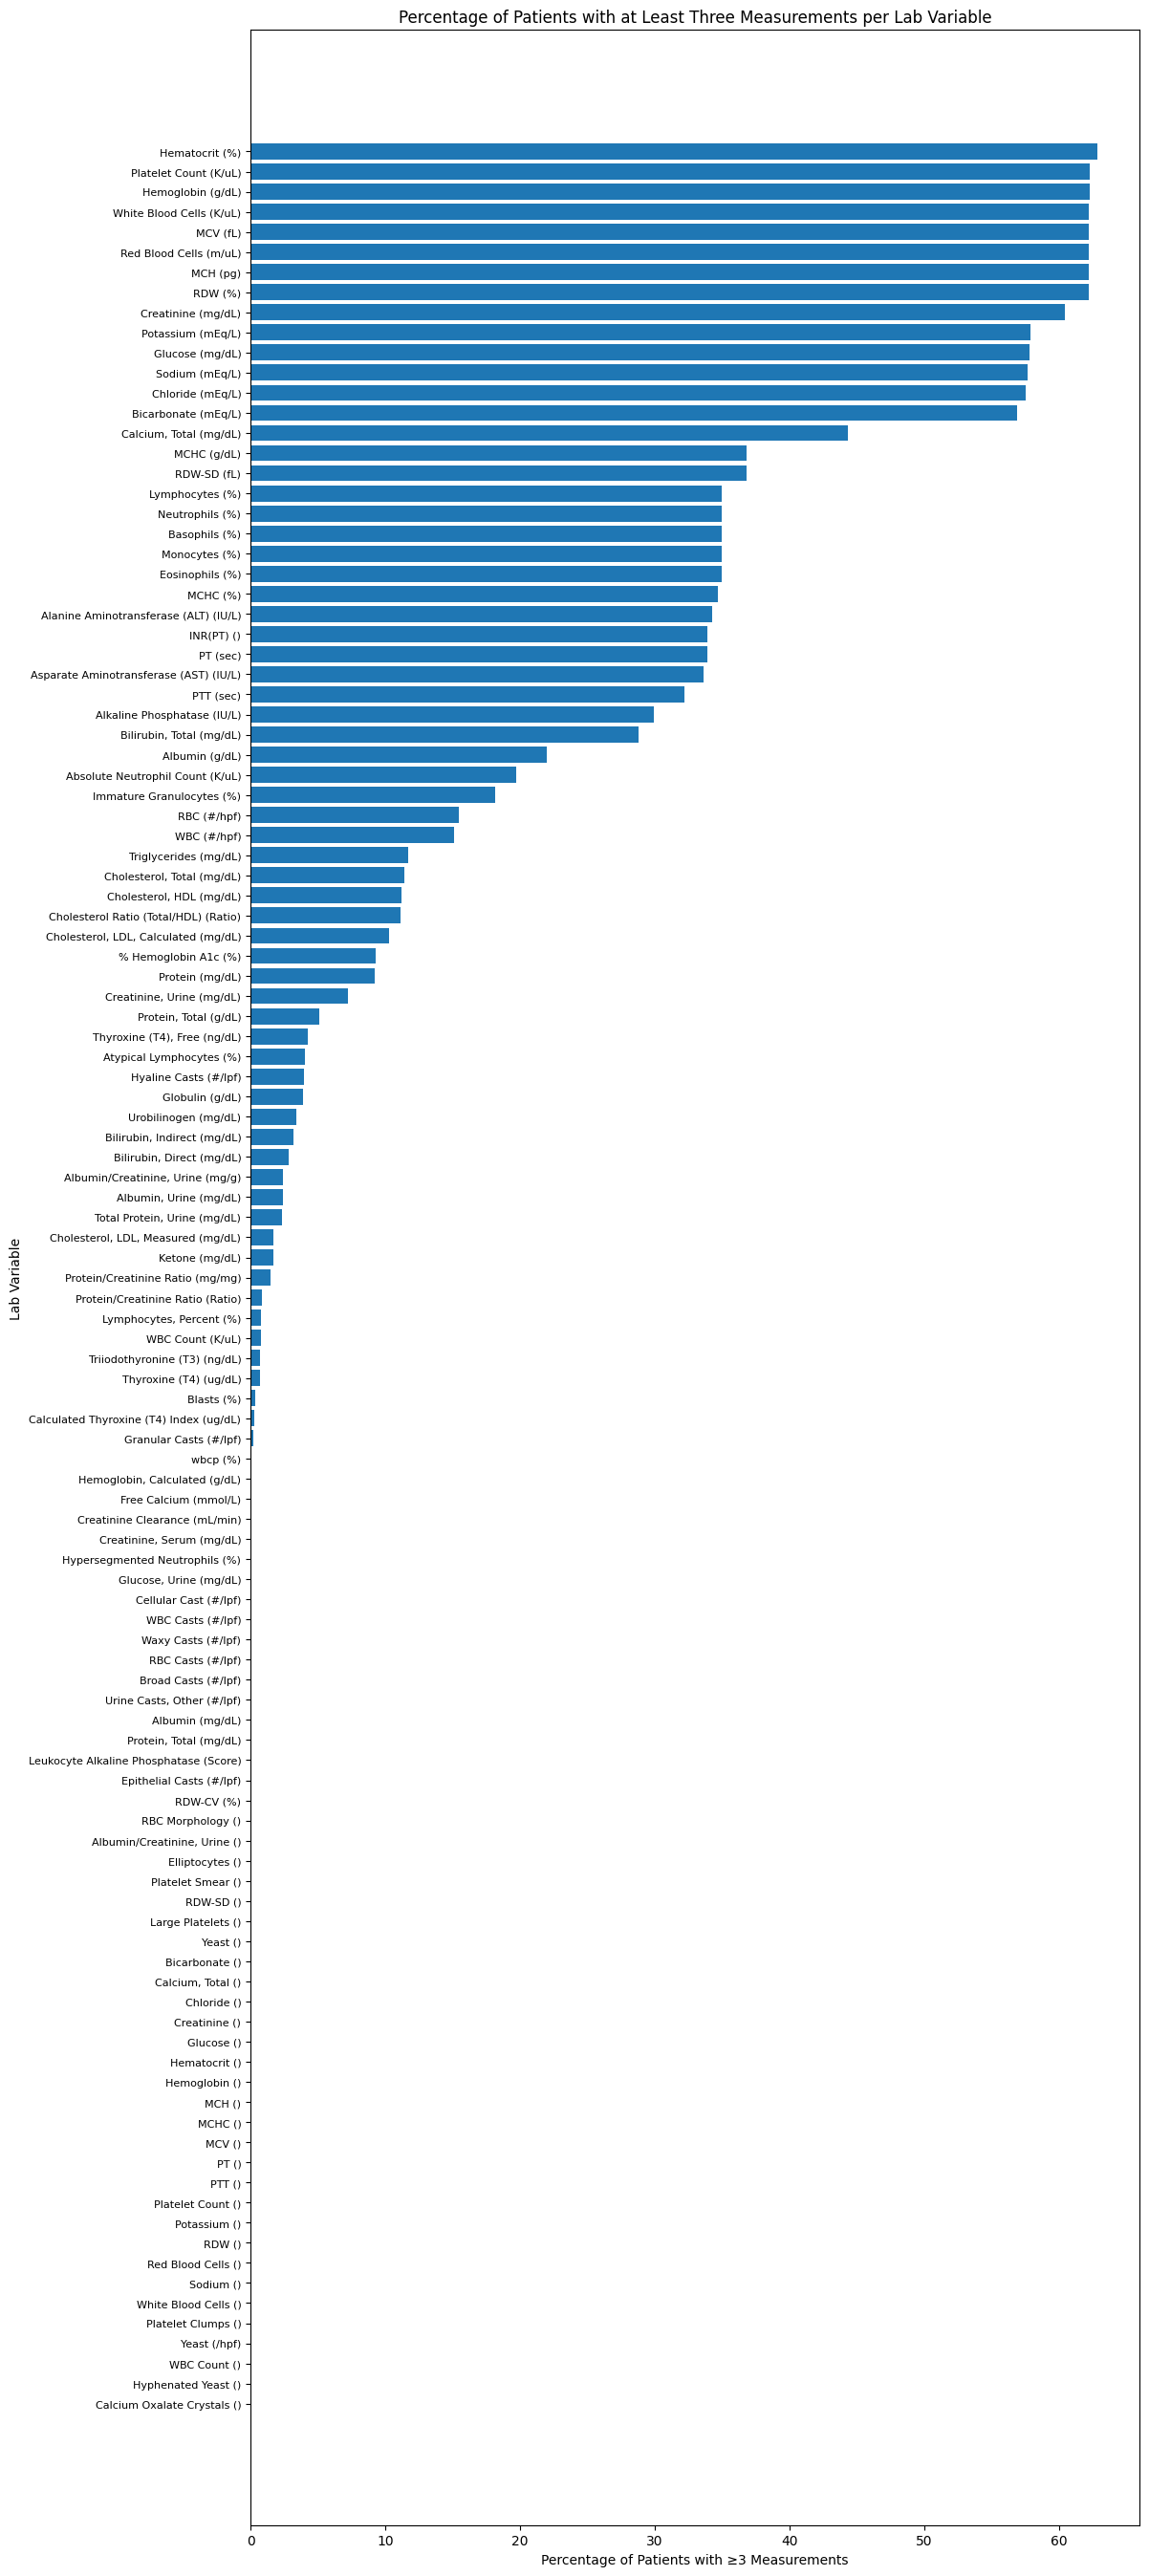

In [107]:
import pickle
import matplotlib.pyplot as plt

# Step 0: Reload patient_data from the pickle file to ensure consistent structure
with open('R:\Kevin\Projects\LLM\patient_data_labevents.pkl', 'rb') as f:
    patient_data = pickle.load(f)

# Step 1: Calculate the total number of unique patients
total_patients = len(patient_data)  # Total number of unique patients

# Step 2: Count measurements per patient for each lab variable
lab_measurement_counts = {}

for patient_id, patient_data_entry in patient_data.items():
    for test_name, measurements in patient_data_entry.items():
        if test_name != 'demographics':  # Skip demographics entry
            if test_name not in lab_measurement_counts:
                lab_measurement_counts[test_name] = set()  # Use a set to track unique patients
            # Check if patient has at least three measurements for the test
            if len(measurements) >= 3:
                lab_measurement_counts[test_name].add(patient_id)

# Step 3: Calculate the percentage of patients for each lab variable
lab_variable_percentages = {
    test_name: (len(patient_ids) / total_patients) * 100
    for test_name, patient_ids in lab_measurement_counts.items()
}

# Step 4: Sort by percentage in descending order
sorted_tests = sorted(lab_variable_percentages.items(), key=lambda x: x[1], reverse=True)
sorted_test_names, sorted_test_percentages = zip(*sorted_tests)

# Step 5: Plot all results, adjusting the y-axis font size for readability
plt.figure(figsize=(12, len(sorted_test_names) * 0.3))  # Dynamically adjust height based on number of tests
plt.barh(sorted_test_names, sorted_test_percentages)
plt.xlabel('Percentage of Patients with ≥3 Measurements')
plt.ylabel('Lab Variable')
plt.title('Percentage of Patients with at Least Three Measurements per Lab Variable')
plt.gca().invert_yaxis()  # Invert to display highest percentages at the top
plt.yticks(fontsize=8)  # Reduce font size on y-axis for readability
plt.show()



In [108]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter for tests of interest and map itemid to test names
labevents_df = labevents_df[labevents_df['itemid'].isin(lab_test_map.keys())]
labevents_df['test_name'] = labevents_df['itemid'].map(lab_test_map)

# Step 2: Calculate the number of unique timestamps for each patient and test
unique_timestamps = labevents_df.groupby(['subject_id', 'test_name'])['charttime'].nunique()

# Convert to Pandas DataFrame for further analysis
unique_timestamps_df = unique_timestamps.compute().reset_index()
unique_timestamps_df.columns = ['subject_id', 'test_name', 'num_timestamps']

# Step 3: Calculate the percentage of patients with multiple unique timestamps for each test
# Filter for patients with multiple timestamps (num_timestamps > 1)
multiple_timestamp_counts = unique_timestamps_df[unique_timestamps_df['num_timestamps'] > 1]
multiple_patient_counts = multiple_timestamp_counts.groupby('test_name')['subject_id'].nunique()

# Calculate total patients per test
total_patients_per_test = unique_timestamps_df.groupby('test_name')['subject_id'].nunique()

# Calculate percentage of patients with multiple timestamps per test
percentage_multiple_timestamps = (multiple_patient_counts / total_patients_per_test) * 100
percentage_multiple_timestamps = percentage_multiple_timestamps.fillna(0).sort_values(ascending=False)



c:\Users\kr3164\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask_expr\_collection.py:4196: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('itemid', 'object'))

  warnings.warn(meta_warning(meta))


## If someone had a test, plot % of patients that have that test recorded at different timestamps
** If someone did not have that test, they are not counted here **

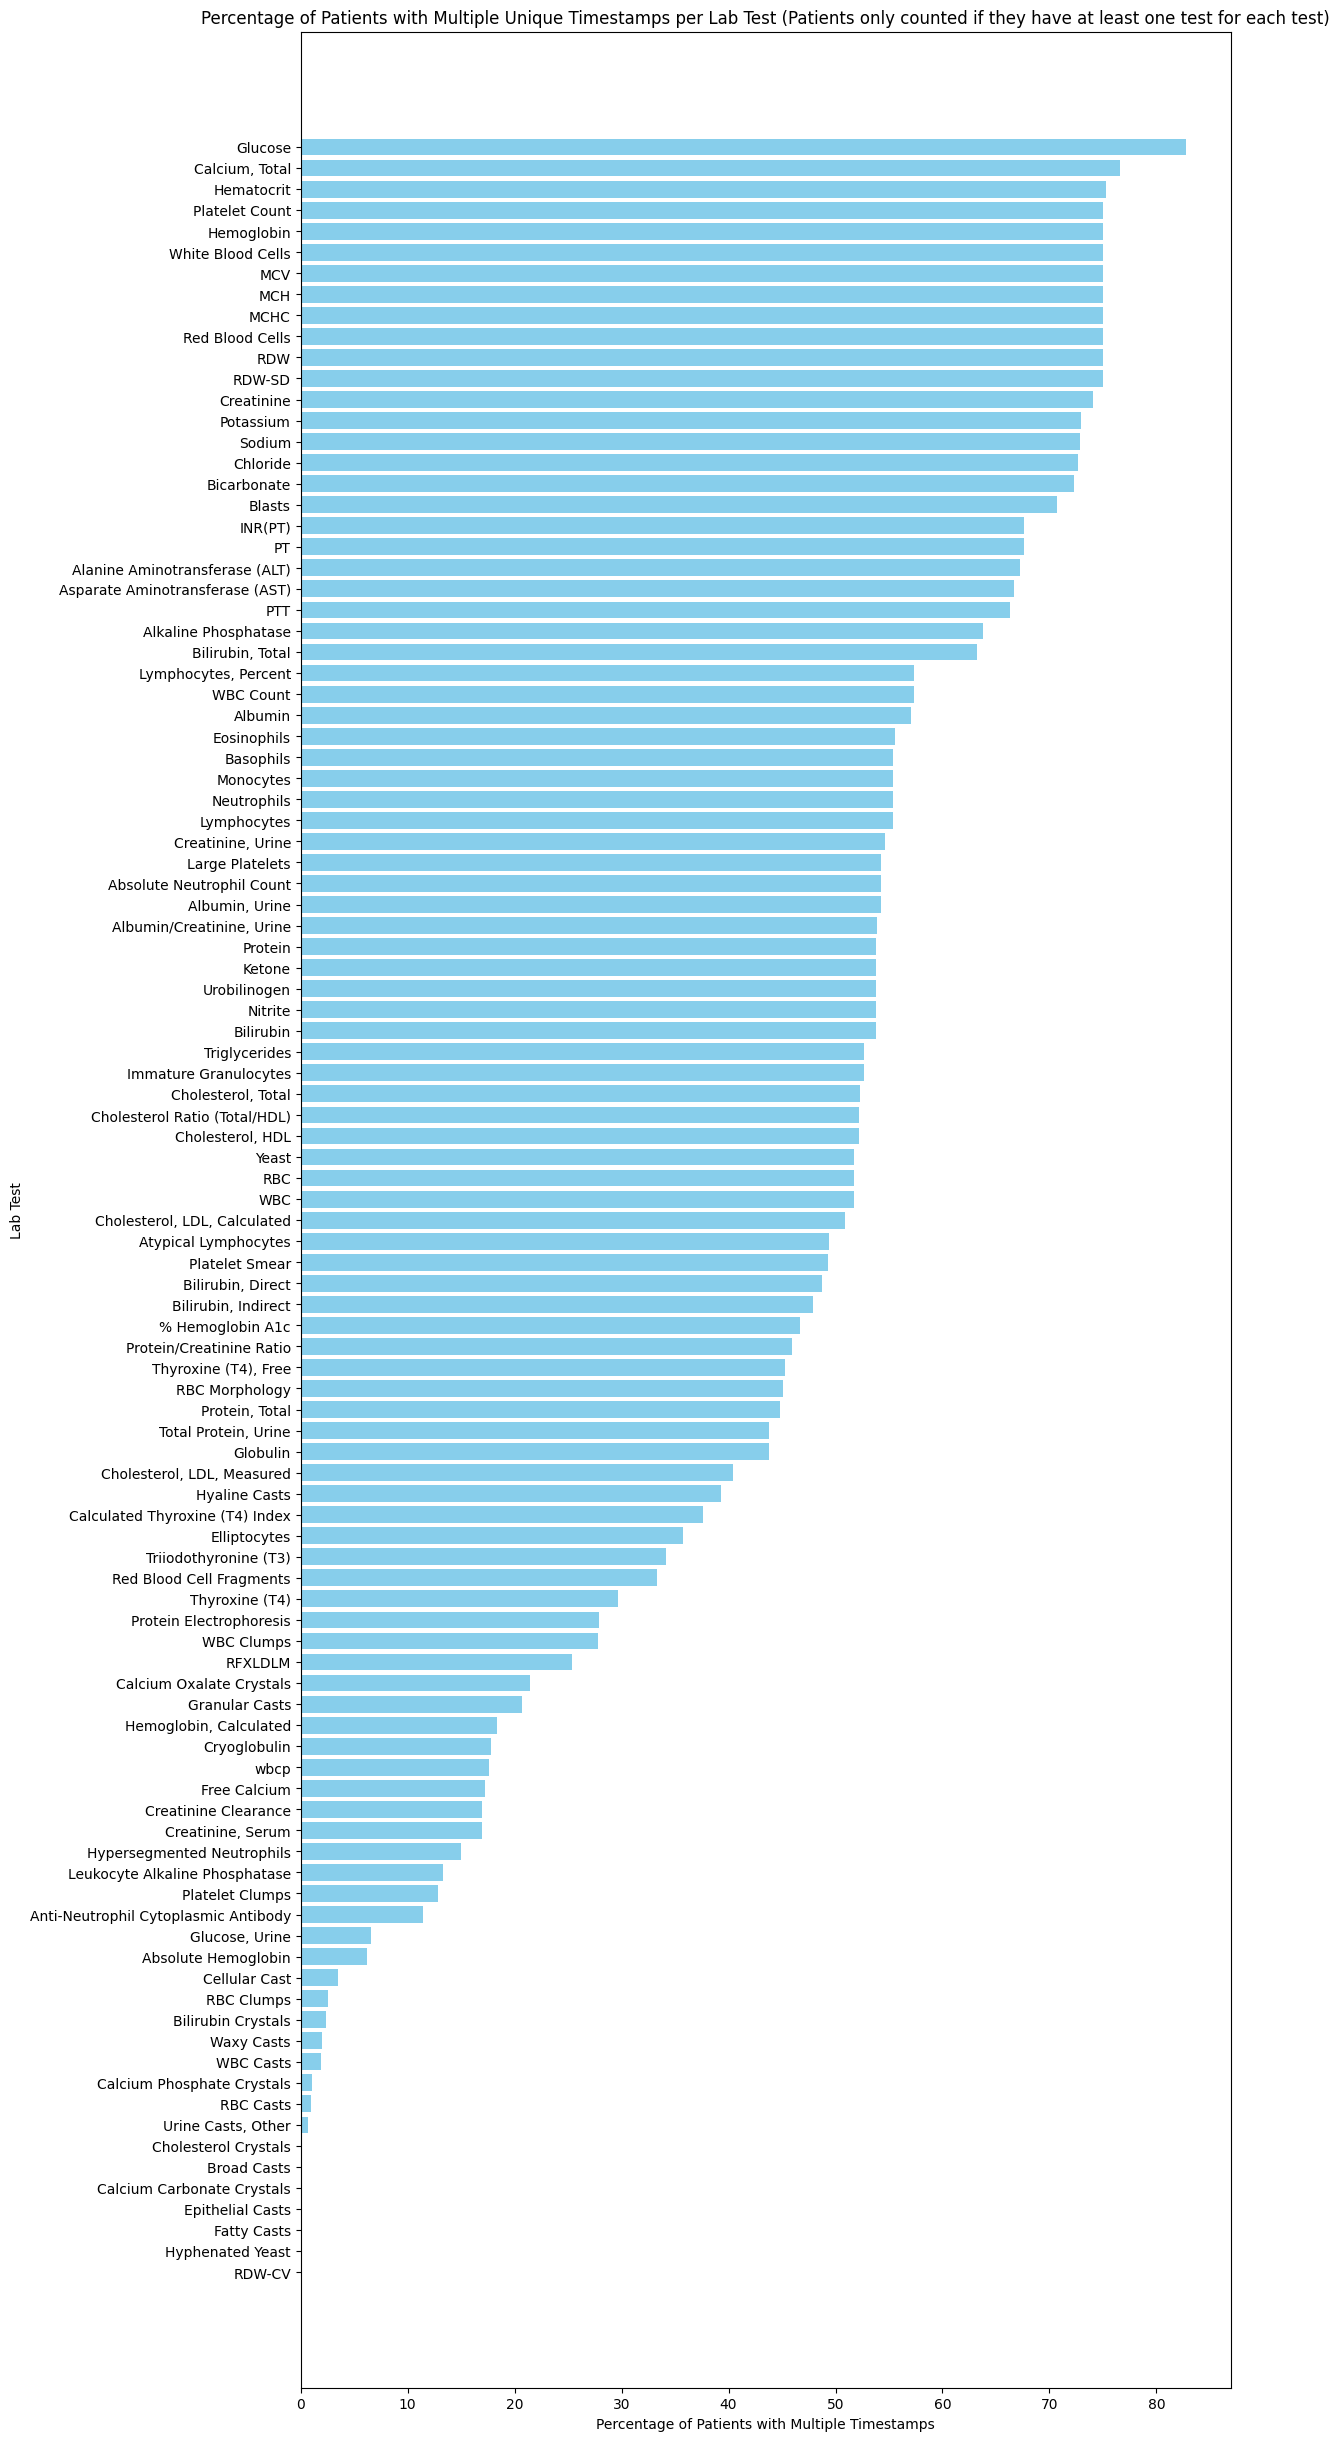

In [109]:
# Step 4: Plot as a horizontal bar chart
plt.figure(figsize=(12, len(percentage_multiple_timestamps) * 0.3))
plt.barh(percentage_multiple_timestamps.index, percentage_multiple_timestamps.values, color="skyblue")
plt.xlabel('Percentage of Patients with Multiple Timestamps')
plt.ylabel('Lab Test')
plt.title('Percentage of Patients with Multiple Unique Timestamps per Lab Test (Patients only counted if they have at least one test for each test)')
plt.gca().invert_yaxis()  # Highest percentage at the top
plt.show()


In [110]:
import dask.dataframe as dd
import pandas as pd
import os
from tqdm import tqdm

# Load the datasets
labevents_df = dd.read_csv(os.path.join(data_dir, 'labevents.csv'))
patients_df = dd.read_csv(os.path.join(data_dir, 'patients.csv'))
admissions_df = dd.read_csv(os.path.join(data_dir, 'admissions.csv'))

# Filter for relevant tests and drop rows with NaNs in `valuenum`
labevents_df = labevents_df[labevents_df['itemid'].isin(lab_test_map.keys())]
labevents_df = labevents_df.dropna(subset=['valuenum'])

# Define a partition function for safe concatenation
def add_test_name_with_unit(partition):
    partition['valueuom'] = partition['valueuom'].fillna('')
    partition['test_name_with_unit'] = partition['itemid'].map(lab_test_map).fillna('') + " (" + partition['valueuom'] + ")"
    return partition

# Apply the function to handle concatenation safely
labevents_df = labevents_df.map_partitions(add_test_name_with_unit)

# Process `charttime` to extract the test year for age calculation
labevents_df['test_year'] = dd.to_datetime(labevents_df['charttime']).dt.year

# Merge with `patients_df` to get demographics
labevents_df = labevents_df.merge(
    patients_df[['subject_id', 'anchor_age', 'anchor_year', 'gender']],
    on='subject_id', how='inner'
)

# Calculate age at test
labevents_df['age_at_test'] = labevents_df['anchor_age'] + (labevents_df['test_year'] - labevents_df['anchor_year'])

# Process `admittime` to get date-only format
admissions_df['admittime'] = dd.to_datetime(admissions_df['admittime']).dt.date

# Merge `admissions_df` for hadm_id and admit date
labevents_df = labevents_df.merge(
    admissions_df[['subject_id', 'hadm_id', 'admittime']],
    on=['subject_id', 'hadm_id'],
    how='left'
)

# You can now proceed with further analysis or additional processing on `labevents_df`



# Partition-wise processing function
def process_partition(partition):
    patient_data = {}
    
    for person_id, group in partition.groupby('subject_id'):
        # Get race from race_lookup, default to 'Unknown' if not found
        race = race_lookup.get(person_id, 'Unknown')
        demographics = [
            int(group.iloc[0]['anchor_age']),
            group.iloc[0]['gender'],
            race
        ]

        # Only include patients with test results
        if group['test_name_with_unit'].notna().any():
            patient_data[person_id] = {'demographics': demographics}
            
            for hadm_id, admission_group in group.groupby('hadm_id'):
                test_data = {}
                for test_name_with_unit, test_group in admission_group.groupby('test_name_with_unit'):
                    test_data[test_name_with_unit] = list(zip(test_group['valuenum'], test_group['age_at_test']))
                
                # Add admission data by `hadm_id` if there are tests for that admission
                if test_data:
                    patient_data[person_id][int(hadm_id)] = test_data

    # Filter out patients without tests at the end
    return {pid: data for pid, data in patient_data.items() if len(data) > 1}

# Define meta for Dask
meta = {
    'subject_id': 'int64',
    'itemid': 'int64',
    'valuenum': 'float64',
    'test_name_with_unit': 'object',
    'test_year': 'int64',
    'anchor_age': 'int64',
    'anchor_year': 'int64',
    'gender': 'object',
    'charttime': 'object',
    'admittime': 'object',
    'hadm_id': 'int64'
}

# Apply partition-wise function with Dask
results = labevents_df.map_partitions(process_partition, meta=meta).compute()

# Combine partition results
combined_patient_data = {}
for partition_data in results:
    combined_patient_data.update(partition_data)

# Display a sample output
pprint.pprint(list(combined_patient_data.items())[:2])  # Display first 2 patients' data for verification


c:\Users\kr3164\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\multi.py:521: UserWarning: Merging dataframes with merge column data type mismatches: 
+------------------------+------------+-------------+
| Merge columns          | left dtype | right dtype |
+------------------------+------------+-------------+
| ('hadm_id', 'hadm_id') | float64    | int64       |
+------------------------+------------+-------------+
Cast dtypes explicitly to avoid unexpected results.
  warnings.warn(


[(10000032,
  {22595853: {'Alanine Aminotransferase (ALT) (IU/L)': [(88.0, 52)],
              'Alkaline Phosphatase (IU/L)': [(103.0, 52)],
              'Asparate Aminotransferase (AST) (IU/L)': [(98.0, 52)],
              'Bicarbonate (mEq/L)': [(28.0, 52)],
              'Bilirubin, Total (mg/dL)': [(1.3, 52)],
              'Calcium, Total (mg/dL)': [(7.8, 52)],
              'Chloride (mEq/L)': [(105.0, 52)],
              'Creatinine (mg/dL)': [(0.3, 52)],
              'Glucose (mg/dL)': [(99.0, 52)],
              'Hematocrit (%)': [(37.6, 52)],
              'Hemoglobin (g/dL)': [(12.7, 52)],
              'INR(PT) ()': [(1.5, 52)],
              'MCH (pg)': [(33.4, 52)],
              'MCHC (%)': [(33.8, 52)],
              'MCV (fL)': [(99.0, 52)],
              'PT (sec)': [(16.6, 52)],
              'PTT (sec)': [(32.3, 52)],
              'Platelet Count (K/uL)': [(71.0, 52)],
              'Potassium (mEq/L)': [(4.5, 52)],
              'Protein (mg/dL)': [(30.0, 52)],


In [111]:
import pickle
import os

# Define the directory where you want to save the file
save_directory = "R:\Kevin\Projects\LLM"
os.makedirs(save_directory, exist_ok=True)  # Create the folder if it doesn't exist

# Save the combined_patient_data dictionary as a pickle file in the specified folder
save_path = os.path.join(save_directory, 'labevents_by_admission.pkl')
with open(save_path, 'wb') as f:
    pickle.dump(combined_patient_data, f)

print(f"Data saved as '{save_path}'")


<>:5: SyntaxWarning: invalid escape sequence '\K'
<>:5: SyntaxWarning: invalid escape sequence '\K'
C:\Users\kr3164\AppData\Local\Temp\ipykernel_2460\3770161520.py:5: SyntaxWarning: invalid escape sequence '\K'
  save_directory = "R:\Kevin\Projects\LLM"


Data saved as 'R:\Kevin\Projects\LLM\labevents_by_admission.pkl'


## Code used to generate excel sheets with test counts 

In [112]:


# Extract test itemids from filtered_tests_result to match in the sampled_labevents_df
test_itemids = filtered_tests_result['itemid'].unique()

# Create a mapping of itemid to test label (name), fluid, and category
itemid_to_label = dict(zip(filtered_tests_result['itemid'], filtered_tests_result['label']))
itemid_to_fluid = dict(zip(filtered_tests_result['itemid'], filtered_tests_result['fluid']))
itemid_to_category = dict(zip(filtered_tests_result['itemid'], filtered_tests_result['category']))

# Filter the sampled_labevents_df to include only rows with itemids that match the tests of interest
matched_tests_df = labevents_df[labevents_df['itemid'].isin(test_itemids)]

# Count the number of occurrences of each test (by itemid) in the sampled_labevents_df
test_counts = matched_tests_df.groupby(['itemid', 'valueuom']).size().reset_index(name='Count')

# Add test names, fluid, and category to the DataFrame using the itemid_to_label, itemid_to_fluid, and itemid_to_category mappings
test_counts['Test Name'] = test_counts['itemid'].map(itemid_to_label)
test_counts['Fluid'] = test_counts['itemid'].map(itemid_to_fluid)
test_counts['Category'] = test_counts['itemid'].map(itemid_to_category)

# Reorder the columns to display itemid, test name, fluid, category, unit of measure, and count
test_counts_df = test_counts[['itemid', 'Test Name', 'Fluid', 'Category', 'valueuom', 'Count']]

# Rename the columns
test_counts_df.columns = ['ItemID', 'Test Name', 'Fluid', 'Category', 'Unit of Measure', 'Count']

# Sort the DataFrame by the 'Count' column in decreasing order
test_counts_df_sorted = test_counts_df.sort_values(by='Count', ascending=False)

# Display the sorted DataFrame
print(test_counts_df_sorted)

# Export the sorted DataFrame to a CSv file and save it to the local directory
output_csv_path = os.path.join(data_dir, 'sorted_test_counts_with_category.csv')
test_counts_df_sorted.to_csv(output_csv_path, index=False)

print(f"CSV file saved at: {output_csv_path}")




TypeError: FrameBase.reset_index() got an unexpected keyword argument 'name'